# Decision Tree Regressor

In [1]:
# read prepped data using pandas

# Title: panda-dev/pandas
# Author: The pandas development team
# Date: 2023
# Code Version: latest
# Availability: https://doi.org/10.5281/zenodo.7741580

import pandas as pd

df = pd.read_csv("source_output/churn_prepped2.csv", header='infer', index_col=0)
df.head(5)

,MonthlyCharge,Children,Age,Tenure,Bandwidth_GB_Year,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,172.455519,0,68,6.795513,904.536110,1,1,1,0,1,1,0,0,0,1,1
1,242.632554,1,27,1.156681,800.982766,0,1,1,1,1,0,0,0,1,1,1
2,159.947583,4,50,15.754144,2054.706961,1,0,1,1,0,0,0,0,0,1,1
3,119.956840,1,48,17.087227,2164.579412,0,0,1,0,1,0,0,0,1,0,1
4,149.948316,0,83,1.670972,271.493436,1,0,0,0,0,0,0,1,1,0,0


In [2]:
# partition data

# Title: scikit-learn/scikit-learn
# Author: Grisel, et al.
# Date: 2022
# Code Version: latest
# Availability: https://doi.org/10.5281/zenodo.6543413

from sklearn.model_selection import train_test_split

X = df.drop(columns='MonthlyCharge')
y = df['MonthlyCharge']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Output

In [3]:
X_train.to_csv("source_output/train_data2.csv")
X_test.to_csv("source_output/test_data2.csv")

## Model

In [4]:
# assign variables and fit model
from sklearn.tree import (DecisionTreeRegressor, plot_tree)

regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=4, min_samples_leaf=5, min_impurity_decrease=0.00)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4, min_samples_leaf=5)

### Decision Tree

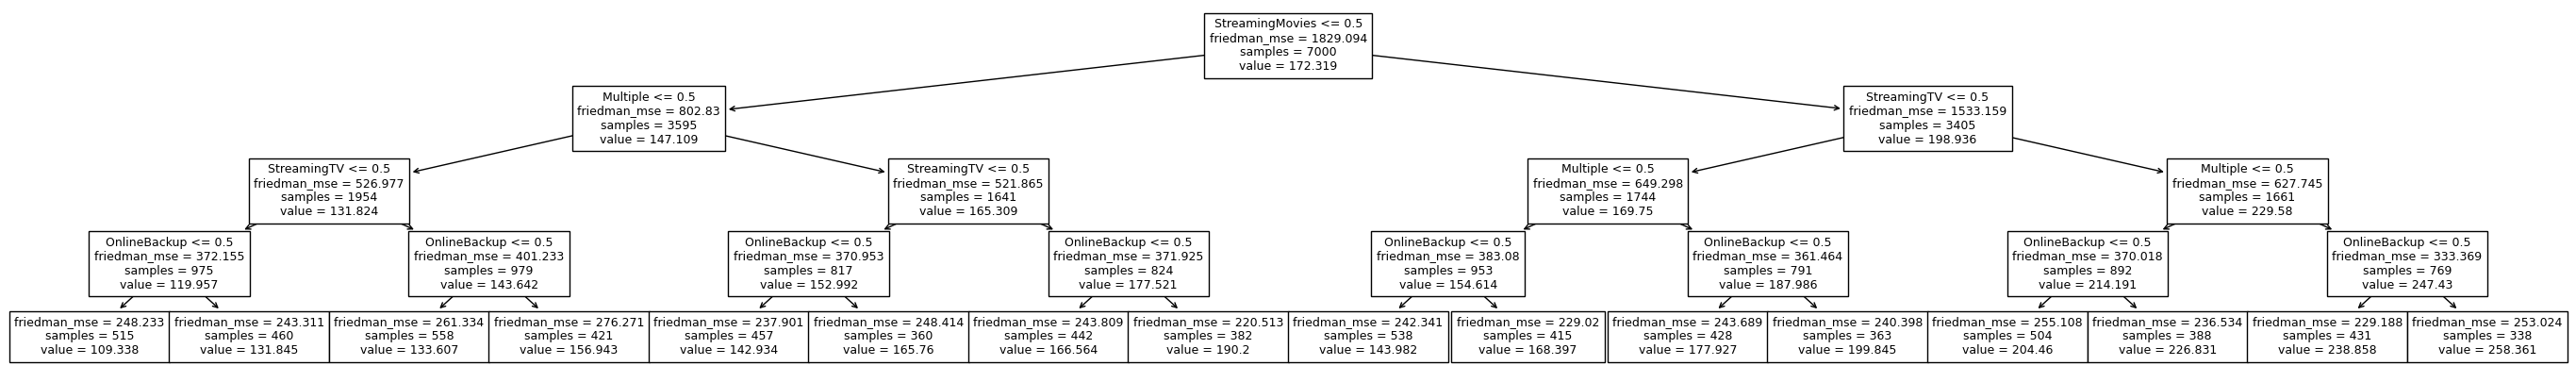

In [5]:
# import matplotlib and plot the decision tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(35, 5))

plot_tree(regressor, feature_names=X.columns, ax=ax, fontsize=9)
plt.show()

### Evaluation: R-squared

In [6]:
# calculate coefficient of determination, R-squared
regressor.score(X_test, y_test)

0.8679509136474834

### Evaluation: Mean Squared Error

In [7]:
# calculate MSE
from sklearn.metrics import mean_squared_error as mse

y_pred = regressor.predict(X_test)
MSE = mse(y_test, y_pred)
MSE

247.9618648945777

In [8]:
# calculate RMSE
import math

math.sqrt(MSE)

15.746804910666091